In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Load data:
clark_county_ts2021 = pd.read_csv("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/Clark_County_TS2021.csv")
bridges_excel = pd.ExcelFile("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/bridges.xlsx")

#naics_stcc = pd.read_excel("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/STCC_NAICS.xlsx")
naics_stcc_excel = pd.ExcelFile("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/STCC_NAICS.xlsx")

# Load necessary sheets from the Excel file
stcc = bridges_excel.parse("STCC")
modes = bridges_excel.parse("Modes")

naics_stcc = naics_stcc_excel.parse("stcc_naics_bridge")
naics_desc = naics_stcc_excel.parse("naics_description")

# Checking for duplicates
clark_county_ts2021 = clark_county_ts2021.drop_duplicates()

# Ensure 'STCC4' column in both dataframes is of type string
# For example, replace NaN with a known string
stcc['STCC4'] = stcc['STCC4'].astype(str)
naics_stcc['STCC4'] = naics_stcc['STCC4'].astype(str)
naics_stcc['NAICS_code'] = naics_stcc['NAICS_code'].astype(str)
# Create a new DataFrame from 'stcc' that only includes rows with 2-digit 'STCC' codes
stcc_2digit = stcc[stcc['STCC'].str.len() == 2].copy()
# Ensure 'STCC4' is of type string
stcc_2digit['STCC4'] = stcc_2digit['STCC4'].astype(str)
# Merge stcc_2digit and naics_stcc using STCC4
#stcc_2digit = pd.merge(stcc_2digit, naics_stcc, how='left', on='STCC4')
stcc = pd.merge(stcc, naics_stcc, how='left', on='STCC4')

# Merge stcc (which now includes naics_stcc data) into clark_county_ts2021 using STCC
clark_county_ts2021 = pd.merge(clark_county_ts2021, stcc, how='left', on='STCC')

# Merge modes into clark_county_ts2021 using Mode
clark_county_ts2021 = pd.merge(clark_county_ts2021, modes, how='left', on='Mode')

# Create 'STCC_2digit' column in 'clark_county_ts2021' DataFrame
clark_county_ts2021['STCC_2digit'] = clark_county_ts2021['STCC'].str[:2]

# Print DataFrame to check
#print(clark_county_ts2021)


In [2]:
print(clark_county_ts2021.columns)

Index(['Year', 'Origin Region', 'Destination Region', 'STCC', 'Trade Type',
       'Mode', 'Tons', 'Units', 'Value', 'Average Miles', 'First Node',
       'Last Node', 'From FIPS', 'To FIPS', 'Entry Road', 'Exit Road',
       'Commodity', 'STCC4', 'NAICS_code', 'Code', 'Name', 'Group',
       'STCC_2digit'],
      dtype='object')


In [2]:
clark_county_ts2021

,Year,Origin Region,Destination Region,STCC,Trade Type,Mode,Tons,Units,Value,Average Miles,...,To FIPS,Entry Road,Exit Road,Commodity,STCC4,NAICS_code,Code,Name,Group,STCC_2digit
0,2015,1,165,01 14,D,4,0.060575,0.003927,1.678699e+01,2348.3999,...,32023,U93,U95,"Oil Kernels, Nuts or Seeds",114,111110,TL,Truck Truckload,Truck,01
1,2015,1,165,01 19,D,4,0.447512,0.021637,6.846934e+01,2348.3999,...,32023,U93,U95,Misc. Field Crops,119,111900,TL,Truck Truckload,Truck,01
2,2015,1,165,14 51,D,4,0.295351,0.012149,1.261019e+01,2339.9998,...,32023,U93,U95,Clay Ceramic or Refrac Minerals,1451,212324,TL,Truck Truckload,Truck,14
3,2015,1,166,35 35,D,5,3.790659,0.285492,3.219333e+04,2192.8999,...,32017,U93,U93,Conveyors or Parts,3535,333922,LTL,Truck L-T-L,Truck,35
4,2015,1,32003,01 19,D,4,0.735466,0.035559,1.125264e+02,1970.6001,...,0,U93,LSahar,Misc. Field Crops,119,111900,TL,Truck Truckload,Truck,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058238,2050,32003,32003,50 1,D,5,36925.441000,1796.137100,5.283480e+07,16.0000,...,0,NaN,NaN,Warehouse & Distribution Center,5010,493000,LTL,Truck L-T-L,Truck,50
1058239,2050,32003,32003,50 1,D,6,841962.750000,40954.977000,1.204723e+09,16.0000,...,0,NaN,NaN,Warehouse & Distribution Center,5010,493000,PVT,Truck PVT,Truck,50
1058240,2050,32003,32003,50 22,D,4,196761.920000,13588.907000,1.063695e+09,16.0000,...,0,NaN,NaN,Rail Intermodal Drayage from Ramp,5022,482110,TL,Truck Truckload,Truck,50
1058241,2050,32003,32003,50 31,D,4,62400.527000,3167.539600,8.104652e+08,16.0000,...,0,NaN,NaN,Air Freight Drayage to Airport,5031,481000,TL,Truck Truckload,Truck,50


In [6]:
# Filter the data
outbound = clark_county_ts2021[(clark_county_ts2021['Origin Region'] == 32003) & (clark_county_ts2021['Destination Region'] != 32003)]
inbound = clark_county_ts2021[(clark_county_ts2021['Origin Region'] != 32003) & (clark_county_ts2021['Destination Region'] == 32003)]
through = clark_county_ts2021[(clark_county_ts2021['Origin Region'] != 32003) & (clark_county_ts2021['Destination Region'] != 32003)]
intra = clark_county_ts2021[(clark_county_ts2021['Origin Region'] == 32003) & (clark_county_ts2021['Destination Region'] == 32003)]

# Group by Year, STCC for each filter and calculate the sum of Values and Tons
outbound_summary = outbound.groupby(['Year', 'Commodity', 'STCC_2digit', 'STCC'])[['Value', 'Tons']].sum().reset_index()
inbound_summary = inbound.groupby(['Year', 'Commodity', 'STCC_2digit', 'STCC'])[['Value', 'Tons']].sum().reset_index()
through_summary = through.groupby(['Year', 'Commodity', 'STCC_2digit', 'STCC'])[['Value', 'Tons']].sum().reset_index()
intra_summary = intra.groupby(['Year', 'Commodity', 'STCC_2digit', 'STCC'])[['Value', 'Tons']].sum().reset_index()

# Rename the Value and Tons columns for each filter
outbound_summary.rename(columns={'Value': 'OB_Value', 'Tons': 'OB_Tons'}, inplace=True)
inbound_summary.rename(columns={'Value': 'IB_Value', 'Tons': 'IB_Tons'}, inplace=True)
through_summary.rename(columns={'Value': 'Thr_Value', 'Tons': 'Thr_Tons'}, inplace=True)
intra_summary.rename(columns={'Value': 'Intr_Value', 'Tons': 'Intr_Tons'}, inplace=True)

# Merge all the DataFrames on Year and STCC
summary_final = pd.merge(outbound_summary, inbound_summary, on=['Year',  'Commodity',  'STCC_2digit','STCC'], how='outer')
summary_final = pd.merge(summary_final, through_summary, on=['Year', 'Commodity',  'STCC_2digit','STCC'], how='outer')
summary_final = pd.merge(summary_final, intra_summary, on=['Year', 'Commodity',  'STCC_2digit','STCC'], how='outer')

# Print the final DataFrame
print(summary_final)


      Year                            Commodity STCC_2digit   STCC  \
0     2015                    Abrasive Products          32  32 91   
1     2015  Accounting or Calculating Equipment          35  35 74   
2     2015                            Adhesives          28  28 91   
3     2015     Air Freight Drayage from Airport          50  50 32   
4     2015       Air Freight Drayage to Airport          50  50 31   
...    ...                                  ...         ...    ...   
1723  2050           Missile or Space Veh Parts          37  37 69   
1724  2050                          Natural Gas          13  13 12   
1725  2050                     Natural Gasoline          13  13 21   
1726  2050                           Silver Ore          10  10 42   
1727  2050                  Special Commodities          41  41 21   

          OB_Value      OB_Tons      IB_Value       IB_Tons     Thr_Value  \
0     1.051899e+05     5.357683  3.748659e+06   1152.449144  5.612459e+07   
1    

In [7]:
print(summary_final.columns)

Index(['Year', 'Commodity', 'STCC_2digit', 'STCC', 'OB_Value', 'OB_Tons',
       'IB_Value', 'IB_Tons', 'Thr_Value', 'Thr_Tons', 'Intr_Value',
       'Intr_Tons'],
      dtype='object')


In [8]:
# Create a copy of the original DataFrame
summary_final_copy = summary_final.copy()

# Calculate total tons and values for each row
summary_final_copy['Total_Tons'] = summary_final_copy[['OB_Tons', 'IB_Tons', 'Thr_Tons', 'Intr_Tons']].sum(axis=1)
summary_final_copy['Total_Value'] = summary_final_copy[['OB_Value', 'IB_Value', 'Thr_Value', 'Intr_Value']].sum(axis=1)

# Calculate total tons and values for each year
total_tons_per_year = summary_final_copy.groupby('Year')[['OB_Tons', 'IB_Tons', 'Thr_Tons', 'Intr_Tons']].sum()
total_values_per_year = summary_final_copy.groupby('Year')[['OB_Value', 'IB_Value', 'Thr_Value', 'Intr_Value']].sum()

# Calculate the percentage for each commodity
for direction in ['OB', 'IB', 'Thr', 'Intr']:
    summary_final_copy[f'{direction}_Tons_%'] = summary_final_copy.apply(lambda row: row[f'{direction}_Tons'] / total_tons_per_year.loc[row['Year'], f'{direction}_Tons'] * 100 if total_tons_per_year.loc[row['Year'], f'{direction}_Tons'] != 0 else 0, axis=1)
    summary_final_copy[f'{direction}_Value_%'] = summary_final_copy.apply(lambda row: row[f'{direction}_Value'] / total_values_per_year.loc[row['Year'], f'{direction}_Value'] * 100 if total_values_per_year.loc[row['Year'], f'{direction}_Value'] != 0 else 0, axis=1)

# Print the final DataFrame
print(summary_final_copy)


      Year                            Commodity STCC_2digit   STCC  \
0     2015                    Abrasive Products          32  32 91   
1     2015  Accounting or Calculating Equipment          35  35 74   
2     2015                            Adhesives          28  28 91   
3     2015     Air Freight Drayage from Airport          50  50 32   
4     2015       Air Freight Drayage to Airport          50  50 31   
...    ...                                  ...         ...    ...   
1723  2050           Missile or Space Veh Parts          37  37 69   
1724  2050                          Natural Gas          13  13 12   
1725  2050                     Natural Gasoline          13  13 21   
1726  2050                           Silver Ore          10  10 42   
1727  2050                  Special Commodities          41  41 21   

          OB_Value      OB_Tons      IB_Value       IB_Tons     Thr_Value  \
0     1.051899e+05     5.357683  3.748659e+06   1152.449144  5.612459e+07   
1    

In [10]:
print(summary_final_copy.columns)

Index(['Year', 'Commodity', 'STCC_2digit', 'STCC', 'OB_Value', 'OB_Tons',
       'IB_Value', 'IB_Tons', 'Thr_Value', 'Thr_Tons', 'Intr_Value',
       'Intr_Tons', 'Total_Tons', 'Total_Value', 'OB_Tons_%', 'OB_Value_%',
       'IB_Tons_%', 'IB_Value_%', 'Thr_Tons_%', 'Thr_Value_%', 'Intr_Tons_%',
       'Intr_Value_%'],
      dtype='object')


In [13]:
filtered_data = summary_final_copy.loc[summary_final_copy['STCC_2digit'] == '50']
print(filtered_data)


      Year                          Commodity STCC_2digit   STCC  \
3     2015   Air Freight Drayage from Airport          50  50 32   
4     2015     Air Freight Drayage to Airport          50  50 31   
240   2015  Rail Intermodal Drayage from Ramp          50  50 22   
241   2015    Rail Intermodal Drayage to Ramp          50  50 21   
301   2015    Warehouse & Distribution Center          50   50 1   
315   2019   Air Freight Drayage from Airport          50  50 32   
316   2019     Air Freight Drayage to Airport          50  50 31   
552   2019  Rail Intermodal Drayage from Ramp          50  50 22   
553   2019    Rail Intermodal Drayage to Ramp          50  50 21   
613   2019    Warehouse & Distribution Center          50   50 1   
627   2021   Air Freight Drayage from Airport          50  50 32   
628   2021     Air Freight Drayage to Airport          50  50 31   
864   2021  Rail Intermodal Drayage from Ramp          50  50 22   
865   2021    Rail Intermodal Drayage to Ramp   

In [75]:
filtered_data.fillna(0, inplace=True)
print(filtered_data)


      Year                          Commodity STCC_2digit   STCC  \
3     2015   Air Freight Drayage from Airport          50  50 32   
4     2015     Air Freight Drayage to Airport          50  50 31   
240   2015  Rail Intermodal Drayage from Ramp          50  50 22   
241   2015    Rail Intermodal Drayage to Ramp          50  50 21   
301   2015    Warehouse & Distribution Center          50   50 1   
315   2019   Air Freight Drayage from Airport          50  50 32   
316   2019     Air Freight Drayage to Airport          50  50 31   
552   2019  Rail Intermodal Drayage from Ramp          50  50 22   
553   2019    Rail Intermodal Drayage to Ramp          50  50 21   
613   2019    Warehouse & Distribution Center          50   50 1   
627   2021   Air Freight Drayage from Airport          50  50 32   
628   2021     Air Freight Drayage to Airport          50  50 31   
864   2021  Rail Intermodal Drayage from Ramp          50  50 22   
865   2021    Rail Intermodal Drayage to Ramp   

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [77]:
print(filtered_data.columns)

Index(['Year', 'Commodity', 'STCC_2digit', 'STCC', 'OB_Value', 'OB_Tons',
       'IB_Value', 'IB_Tons', 'Thr_Value', 'Thr_Tons', 'Intr_Value',
       'Intr_Tons', 'Total_Tons', 'Total_Value', 'OB_Tons_%', 'OB_Value_%',
       'IB_Tons_%', 'IB_Value_%', 'Thr_Tons_%', 'Thr_Value_%', 'Intr_Tons_%',
       'Intr_Value_%'],
      dtype='object')


In [85]:
# Create a new column combining 'STCC' and 'Commodity'
filtered_data['STCC_Commodity'] = filtered_data['STCC'].astype(str) + " " + filtered_data['Commodity']
aggregated_summary = filtered_data
print(aggregated_summary)

      Year                          Commodity STCC_2digit   STCC  \
3     2015   Air Freight Drayage from Airport          50  50 32   
4     2015     Air Freight Drayage to Airport          50  50 31   
240   2015  Rail Intermodal Drayage from Ramp          50  50 22   
241   2015    Rail Intermodal Drayage to Ramp          50  50 21   
301   2015    Warehouse & Distribution Center          50   50 1   
315   2019   Air Freight Drayage from Airport          50  50 32   
316   2019     Air Freight Drayage to Airport          50  50 31   
552   2019  Rail Intermodal Drayage from Ramp          50  50 22   
553   2019    Rail Intermodal Drayage to Ramp          50  50 21   
613   2019    Warehouse & Distribution Center          50   50 1   
627   2021   Air Freight Drayage from Airport          50  50 32   
628   2021     Air Freight Drayage to Airport          50  50 31   
864   2021  Rail Intermodal Drayage from Ramp          50  50 22   
865   2021    Rail Intermodal Drayage to Ramp   

<ipython-input-85-ee63680ea2dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['STCC_Commodity'] = filtered_data['STCC'].astype(str) + " " + filtered_data['Commodity']


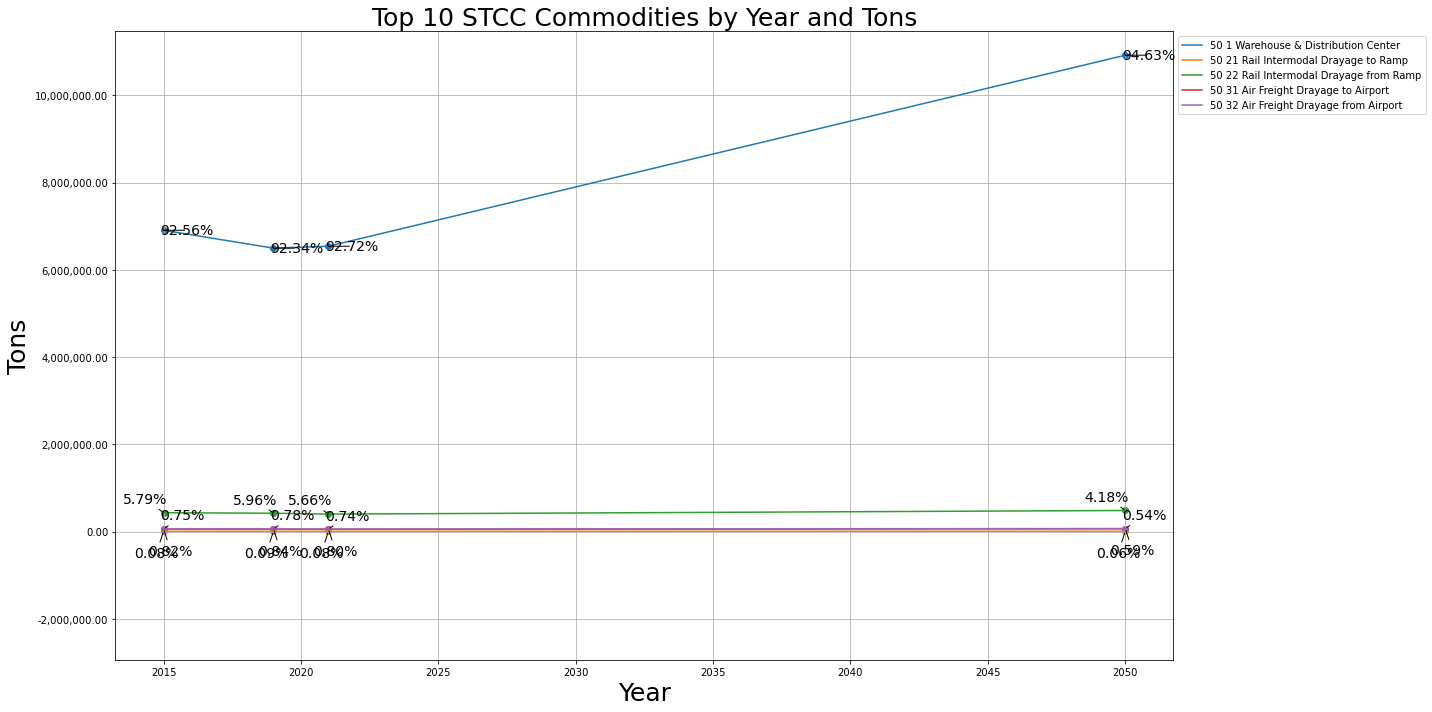

In [91]:
# Step 2: Group by Year and STCC_Commodity and sum up the Tons
grouped = aggregated_summary.groupby(['Year', 'STCC_Commodity'])['Total_Tons'].sum()

filtered_summary = aggregated_summary[aggregated_summary['STCC_Commodity'].isin(all_top_commodities)]

# Step 5: Create a Pivot Table
pivot_data = filtered_summary.pivot(index='Year', columns='STCC_Commodity', values='Total_Tons')

# Step 6: Calculate Percentage Share of Each Commodity per Year
total_tons_per_year_all_commodities = aggregated_summary.groupby('Year')['Total_Tons'].sum()

def calculate_percent_share(row):
    year = row.name
    total_for_year = total_tons_per_year_all_commodities[year]
    return (row / total_for_year) * 100

percent_df = pivot_data.apply(calculate_percent_share, axis=1)

# Your annotation spreading function
def spread_annotations(ax, year, value, percent, base_radius=15):
    n = len(percent)  # number of commodities
    spread_radius = base_radius + 2 * (n-1)  # Dynamic radius adjustment
    angles = np.linspace(0, 2 * np.pi, n + 1)[:-1]  # full circle
    median_value = np.median(value.values)
    
    for idx, (commodity, pct) in enumerate(percent.items()):
        # Check if the value is above or below the median
        angle_multiplier = 1 if value[commodity] >= median_value else -1

        x_offset = spread_radius * np.cos(angles[idx]) * angle_multiplier
        y_offset = spread_radius * np.sin(angles[idx]) * angle_multiplier

        ax.annotate(f"{pct:.2f}%", 
                    (year, value[commodity]), 
                    textcoords="offset pixels", 
                    xytext=(x_offset, y_offset), 
                    ha='center', 
                    va='center', 
                    arrowprops=dict(arrowstyle='-', lw=1),
                    fontsize=14)

# Your plotting function
def create_time_series_pivot(df, percent_df):
    fig, ax = plt.subplots(figsize=(20, 10))
    
    for commodity in df.columns:
        ax.plot(df.index, df[commodity], label=commodity)
        ax.scatter(df.index, df[commodity])
    
    for year in df.index:
        spread_annotations(ax, year, df.loc[year], percent_df.loc[year])

    # Set legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    ax.set_title('Top 10 STCC Commodities by Year and Tons', fontsize=25)
    ax.set_xlabel('Year', fontsize=25)
    ax.set_ylabel('Tons', fontsize=25)
    ax.grid(True)
    
    # Extend y-limit
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin - 0.2 * (ymax - ymin), ymax)  # provide an extra 20% space at the bottom
    
    # Adjust the layout
    plt.tight_layout()
    plt.show()

create_time_series_pivot(pivot_data, percent_df)

In [76]:
#filtered_data.to_csv('filtered_data_STCC50.csv', index=False)


###Summary of the TOP 10 2 digit, break down of 4 digit commodity codes

In [58]:
# Step 1: Aggregate total tons and values for each STCC_2digit per year
aggregated_summary = summary_final_copy.groupby(['Year', 'STCC_2digit'])[['OB_Tons', 'IB_Tons', 'Thr_Tons', 'Intr_Tons', 'OB_Value', 'IB_Value', 'Thr_Value', 'Intr_Value']].sum().reset_index()
aggregated_summary['Total_Tons'] = aggregated_summary[['OB_Tons', 'IB_Tons', 'Thr_Tons', 'Intr_Tons']].sum(axis=1)
aggregated_summary['Total_Value'] = aggregated_summary[['OB_Value', 'IB_Value', 'Thr_Value', 'Intr_Value']].sum(axis=1)

# Step 2: Identify the top 10 STCC_2digit commodities by Total_Tons and Total_Value per year
top_commodities_per_year_tons = {}
top_commodities_per_year_value = {}

for year in aggregated_summary['Year'].unique():
    top_tons_for_year = aggregated_summary[aggregated_summary['Year'] == year].nlargest(5, 'Total_Tons')['STCC_2digit'].tolist()
    top_value_for_year = aggregated_summary[aggregated_summary['Year'] == year].nlargest(5, 'Total_Value')['STCC_2digit'].tolist()
    top_commodities_per_year_tons[year] = top_tons_for_year
    top_commodities_per_year_value[year] = top_value_for_year

# Gather all unique top commodities across all years (for both tons and value)
all_top_commodities = set().union(*top_commodities_per_year_tons.values(), *top_commodities_per_year_value.values())

# Step 3: Filter the original dataset
filtered_summary = summary_final_copy[summary_final_copy['STCC_2digit'].isin(all_top_commodities)]

# Fill NaN values with 0 for tons and $0.00 for dollar columns
#filtered_summary[Total_Tons] = filtered_summary[Total_Tons].fillna('0')
#filtered_summary[Total_Value] = filtered_summary[Total_Value].fillna('0')
# Print the results
print(filtered_summary)

# (Optional) To view the total tons and value for all commodities across all years:
total_tons_per_year_all_commodities = aggregated_summary.groupby('Year')['Total_Tons'].sum()
total_value_per_year_all_commodities = aggregated_summary.groupby('Year')['Total_Value'].sum()
#print(total_tons_per_year_all_commodities)
#print(total_value_per_year_all_commodities)



      Year                            Commodity STCC_2digit   STCC  \
0     2015                    Abrasive Products          32  32 91   
1     2015  Accounting or Calculating Equipment          35  35 74   
2     2015                            Adhesives          28  28 91   
3     2015     Air Freight Drayage from Airport          50  50 32   
4     2015       Air Freight Drayage to Airport          50  50 31   
...    ...                                  ...         ...    ...   
1714  2050                                Ashes          40  40 11   
1717  2050          Condensed, Evap or Dry Milk          20  20 23   
1718  2050            Cottonseed Oil or By-prod          20  20 91   
1719  2050     Crude Prod Of Coal,gas,petroleum          28  28 14   
1723  2050           Missile or Space Veh Parts          37  37 69   

          OB_Value      OB_Tons      IB_Value       IB_Tons     Thr_Value  \
0     1.051899e+05     5.357683  3.748659e+06   1152.449144  5.612459e+07   
1    

In [25]:
filtered_summary.to_csv('filtered_summary.csv', index=False)


In [61]:
# Define the formatting functions
def format_tons(value):
    try:
        value = float(value)
        return '{:,.2f}'.format(value)
    except:
        return '0'

def format_dollars(value):
    try:
        value = float(value)
        return '${:,.2f}'.format(value)
    except:
        return '$0'

def format_percent(value):
    try:
        value = float(value)
        return '{:.4f}%'.format(value)
    except:
        return '0%'

# Specify desired columns
ton_columns = ['OB_Tons', 'IB_Tons', 'Thr_Tons', 'Intr_Tons', 'Total_Tons']
dollar_columns = ['OB_Value', 'IB_Value', 'Thr_Value', 'Intr_Value', 'Total_Value']

# Check for existence of columns
existing_ton_columns = [col for col in ton_columns if col in filtered_summary.columns]
existing_dollar_columns = [col for col in dollar_columns if col in filtered_summary.columns]

# First, fill NaN values for the existing numeric columns
filtered_summary[existing_ton_columns] = filtered_summary[existing_ton_columns].fillna(0)
filtered_summary[existing_dollar_columns] = filtered_summary[existing_dollar_columns].fillna(0)

# Now, format the columns
filtered_summary[existing_ton_columns] = filtered_summary[existing_ton_columns].applymap(format_tons)
filtered_summary[existing_dollar_columns] = filtered_summary[existing_dollar_columns].applymap(format_dollars)

# Format percentage columns
percent_columns = [col for col in filtered_summary.columns if col.endswith('_')]
filtered_summary[percent_columns] = filtered_summary[percent_columns].applymap(format_percent)

# Print the final DataFrame
print(filtered_summary)


      Year                            Commodity STCC_2digit   STCC OB_Value  \
0     2015                    Abrasive Products          32  32 91       $0   
1     2015  Accounting or Calculating Equipment          35  35 74       $0   
2     2015                            Adhesives          28  28 91       $0   
3     2015     Air Freight Drayage from Airport          50  50 32       $0   
4     2015       Air Freight Drayage to Airport          50  50 31       $0   
...    ...                                  ...         ...    ...      ...   
1714  2050                                Ashes          40  40 11       $0   
1717  2050          Condensed, Evap or Dry Milk          20  20 23       $0   
1718  2050            Cottonseed Oil or By-prod          20  20 91       $0   
1719  2050     Crude Prod Of Coal,gas,petroleum          28  28 14       $0   
1723  2050           Missile or Space Veh Parts          37  37 69       $0   

     OB_Tons IB_Value IB_Tons Thr_Value Thr_Tons In

C:\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
codes_to_filter = ['28', '36', '34', '35']
filtered_2digits = summary_final_copy.loc[summary_final_copy['STCC_2digit'].isin(codes_to_filter)]
print(filtered_2digits)


      Year                            Commodity STCC_2digit   STCC  \
1     2015  Accounting or Calculating Equipment          35  35 74   
2     2015                            Adhesives          28  28 91   
11    2015             Architectural Metal Work          34  34 46   
21    2015            Bolts, Nuts, Screws, Etc.          34  34 52   
27    2015         Builders or Cabinet Hardware          34  34 28   
...    ...                                  ...         ...    ...   
1668  2050                    Welding Apparatus          36  36 23   
1677  2015     Crude Prod Of Coal,gas,petroleum          28  28 14   
1691  2019     Crude Prod Of Coal,gas,petroleum          28  28 14   
1705  2021     Crude Prod Of Coal,gas,petroleum          28  28 14   
1719  2050     Crude Prod Of Coal,gas,petroleum          28  28 14   

          OB_Value      OB_Tons      IB_Value       IB_Tons     Thr_Value  \
1     5.607153e+06  1152.165831  1.743782e+08  29890.298108  7.519239e+08   
2    

In [17]:
filtered_2digits.to_excel('filtered_2digits.xlsx', index=False)


In [18]:
print(filtered_2digits.columns)

Index(['Year', 'Commodity', 'STCC_2digit', 'STCC', 'OB_Value', 'OB_Tons',
       'IB_Value', 'IB_Tons', 'Thr_Value', 'Thr_Tons', 'Intr_Value',
       'Intr_Tons', 'Total_Tons', 'Total_Value', 'OB_Tons_%', 'OB_Value_%',
       'IB_Tons_%', 'IB_Value_%', 'Thr_Tons_%', 'Thr_Value_%', 'Intr_Tons_%',
       'Intr_Value_%'],
      dtype='object')


In [20]:
codes_to_filter = ['28', '36', '34', '35']
years_to_filter = [2015, 2019, 2021, 2050]
filtered_data = summary_final_copy[summary_final_copy['STCC_2digit'].isin(codes_to_filter) & summary_final_copy['Year'].isin(years_to_filter)]

# Function to get the top 10 by Total_Value for each STCC_2digit and year
def top_10_by_value_per_year(group):
    return group.groupby('Year').apply(lambda x: x.nlargest(10, 'Total_Value')).reset_index(drop=True)

# Apply the function
top_10_by_value = filtered_data.groupby('STCC_2digit').apply(top_10_by_value_per_year).reset_index(drop=True)

# Save to Excel
top_10_by_value.to_excel('top_10_by_value_per_year.xlsx', index=False)


In [21]:
# Function to get the top 10 by Total_Tons for each STCC_2digit and year
def top_10_by_tons_per_year(group):
    return group.groupby('Year').apply(lambda x: x.nlargest(10, 'Total_Tons')).reset_index(drop=True)

# Apply the function
top_10_by_tons = filtered_data.groupby('STCC_2digit').apply(top_10_by_tons_per_year).reset_index(drop=True)

# Save to Excel
top_10_by_tons.to_excel('top_10_by_tons_per_year.xlsx', index=False)
